# Part 2, Lesson 2 - Data Engineering
# API example - Yahoo Finance

You can get Yahoo Finance data from several packages:
* yfinance
* yahoofinancials
* pandas_datareader

All these packages are not supported by Anaconda and you will need to install them with the terminal command: **pip install**. 

The first 2 Python packages above are for Yahoo data only, and you can see their example in: https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/

In this notebook I will show pandas_datareader. This package reads data directly into a data frame, from multiple available financial data sources. See full list in:  https://pandas-datareader.readthedocs.io/en/latest/remote_data.html  

In [1]:
# Common imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Date and time data handling
import datetime as dt

# API package to read the data from source
import pandas_datareader.data as web 

In [2]:
# Getting the stock data using yahoo finance
start = dt.datetime(2012, 4, 1)
end   = dt.datetime(2022, 4, 1)
df    = web.DataReader( "AAPL", 'yahoo', start, end)  # Collects Yahoo data prices in USD of stock(s)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-02,22.098928,21.442142,21.493929,22.093929,598351600.0,18.918463
2012-04-03,22.578930,22.232500,22.403570,22.475714,834559600.0,19.245375
2012-04-04,22.352142,22.035713,22.298214,22.296785,572980800.0,19.092157
2012-04-05,22.666430,22.264286,22.392143,22.631430,641298000.0,19.378712
2012-04-09,22.851429,22.332144,22.361786,22.722500,597536800.0,19.456688


In [3]:
# Data of specific date
df.loc['2018-08-31']

High         5.721750e+01
Low          5.650000e+01
Open         5.662750e+01
Close        5.690750e+01
Volume       1.733604e+08
Adj Close    5.498238e+01
Name: 2018-08-31 00:00:00, dtype: float64

<AxesSubplot:title={'center':"APPLE's stock price"}, xlabel='Date'>

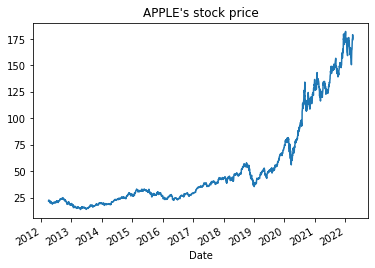

In [4]:
# Selected column graph
df['Close'].plot(title="APPLE's stock price")

## Comparing two stocks

In [5]:
df2   = web.DataReader( "FB", 'yahoo', start, end)

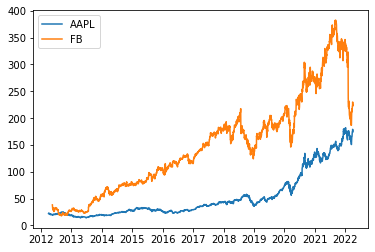

In [6]:
plt.plot(df.Close,  label = "AAPL")
plt.plot(df2.Close, label = "FB")
plt.legend()
plt.show()

## Handling multi stocks

The input to DataReader can be a list of stock symbols.

In [7]:
symbols = ["FB", 'AAPL', 'AMZN', 'NFLX', 'GOOG','MSFT']

In [8]:
df_multi   = web.DataReader( symbols , 'yahoo', start, end)
df_multi.head()

Attributes Adj Close                                                           \
Symbols           FB       AAPL        AMZN       NFLX        GOOG       MSFT   
Date                                                                            
2012-04-02       NaN  18.918468  198.050003  16.281429  322.252106  26.253553   
2012-04-03       NaN  19.245373  199.660004  16.137142  320.110138  25.968987   
2012-04-04       NaN  19.092159  193.990005  15.751429  316.389099  25.375450   
2012-04-05       NaN  19.378708  194.389999  15.785714  314.979370  25.627495   
2012-04-09       NaN  19.456688  191.869995  15.240000  314.242157  25.286015   

Attributes Close                                    ...        Open  \
Symbols       FB       AAPL        AMZN       NFLX  ...        AMZN   
Date                                                ...               
2012-04-02   NaN  22.093929  198.050003  16.281429  ...  198.020004   
2012-04-03   NaN  22.475714  199.660004  16.137142  ...  198.240005   
2012-04-04   NaN  22.296785  193.990005  15.751429  ...  196.949997   
2012-04-05   NaN  22.631430  194.389999  15.785714  ...  193.550003   
2012-04-09   NaN  22.722500  191.869995  15.240000  ...  192.020004   

Attributes                                   Volume                          \
Symbols          NFLX        GOOG       MSFT     FB         AAPL       AMZN   
Date                                                                          
2012-04-02  16.400000  319.188599  32.220001    NaN  598351600.0  6430300.0   
2012-04-03  15.831429  321.499939  32.160000    NaN  834559600.0  5000700.0   
2012-04-04  15.947143  318.032928  31.660000    NaN  572980800.0  5456900.0   
2012-04-05  15.705714  314.939514  31.150000    NaN  641298000.0  3217500.0   
2012-04-09  15.537143  313.066559  31.219999    NaN  597536800.0  3135900.0   

Attributes                                     
Symbols           NFLX       GOOG        MSFT  
Date                                           
2012-04-02  26645500.0  4585523.0  35853600.0  
2012-04-03  46004700.0  4105130.0  42752100.0  
2012-04-04  20766200.0  3267401.0  49455900.0  
2012-04-05  22763300.0  4654782.0  50368600.0  
2012-04-09  22637300.0  4381763.0  31056400.0  

[5 rows x 36 columns]

In [9]:
df_multi.tail()

Attributes   Adj Close                                                    \
Symbols             FB        AAPL         AMZN        NFLX         GOOG   
Date                                                                       
2022-03-28  223.589996  175.600006  3379.810059  378.510010  2839.000000   
2022-03-29  229.860001  178.960007  3386.300049  391.820007  2865.000000   
2022-03-30  227.850006  177.770004  3326.020020  381.470001  2852.889893   
2022-03-31  222.360001  174.610001  3259.949951  374.589996  2792.989990   
2022-04-01  224.850006  174.309998  3271.199951  373.470001  2814.000000   

Attributes                   Close                                       ...  \
Symbols           MSFT          FB        AAPL         AMZN        NFLX  ...   
Date                                                                     ...   
2022-03-28  310.700012  223.589996  175.600006  3379.810059  378.510010  ...   
2022-03-29  315.410004  229.860001  178.960007  3386.300049  391.820007  ...   
2022-03-30  313.859985  227.850006  177.770004  3326.020020  381.470001  ...   
2022-03-31  308.309998  222.360001  174.610001  3259.949951  374.589996  ...   
2022-04-01  309.420013  224.850006  174.309998  3271.199951  373.470001  ...   

Attributes         Open                                           Volume  \
Symbols            AMZN        NFLX         GOOG        MSFT          FB   
Date                                                                       
2022-03-28  3299.500000  375.230011  2813.689941  304.329987  26224100.0   
2022-03-29  3407.679932  384.390015  2863.209961  313.910004  31417900.0   
2022-03-30  3370.189941  389.549988  2857.399902  313.760010  25588000.0   
2022-03-31  3328.899902  383.589996  2848.969971  313.899994  24192300.0   
2022-04-01  3282.989990  376.799988  2800.199951  309.369995  19533300.0   

Attributes                                                            
Symbols            AAPL       AMZN       NFLX       GOOG        MSFT  
Date                                                                  
2022-03-28   90371900.0  2992700.0  4323400.0  1188700.0  29578200.0  
2022-03-29  100589400.0  3307700.0  5880700.0  1433900.0  30393400.0  
2022-03-30   92633200.0  2808400.0  4023300.0  1052300.0  28163600.0  
2022-03-31  103049300.0  2998300.0  4134700.0  1475800.0  33422100.0  
2022-04-01   78699800.0  2851800.0  4639800.0  1173600.0  27085100.0  

[5 rows x 36 columns]

In [10]:
df_multi.Close['FB']

Date
2012-04-02           NaN
2012-04-03           NaN
2012-04-04           NaN
2012-04-05           NaN
2012-04-09           NaN
                 ...    
2022-03-28    223.589996
2022-03-29    229.860001
2022-03-30    227.850006
2022-03-31    222.360001
2022-04-01    224.850006
Name: FB, Length: 2518, dtype: float64

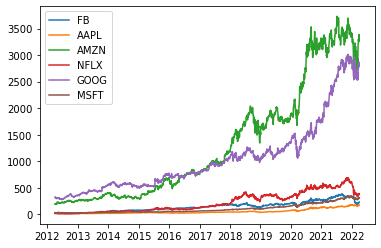

In [11]:
for symbol in symbols :
    plt.plot(df_multi.Close[symbol],  label = symbol)
    
plt.legend()
plt.show()